# Multi Point Integration

In [1]:
import numpy as np
import MultiPoint.WLCgreen as wlc
import MultiPoint.propagator as propagator
import MultiPoint.special as sp
from numba import jit
import MultiPoint.MultiPoint as mp
import imp  # imp.reload(module)

import matplotlib.pyplot as plt
%matplotlib
#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

Using matplotlib backend: Qt5Agg


In [2]:
def plotlog(x, y, alpha, xrange=1, numx=2):
    xv = np.logspace(np.log10(x), np.log10(x) + xrange, numx)
    C = y / (x**alpha)
    yv = C * xv**(alpha)
    plt.loglog(xv, yv,'k--')

## 2 point

In [ ]:
nlam=3
ORDEig=25
d=3
mu=0

nkpts=500
K=np.logspace(-5,7,nkpts)
props=[] # list of propagators at each K
for ii in range(0,nkpts):
    name = ii
    props.append(propagator.propagator(name,K[ii],mu,nlam=nlam))

### AA

In [4]:
fa=0.5
N=[0.1,1.0,10,100,1000,10000,100000]
ana=np.zeros((nkpts,len(N)),dtype=type(1+1j))
dub=np.zeros((nkpts,len(N)),dtype=type(1+1j))
for ii in range(0,nkpts):
    lam=0
    lam0=0
    for nn in range(0,len(N)):
        ana[ii,nn]=mp.IAAswitch(N[nn],fa,lam0,lam,props[ii])
        dub[ii,nn]=mp.IAAexplicit(N[nn],fa,lam0,lam,props[ii])

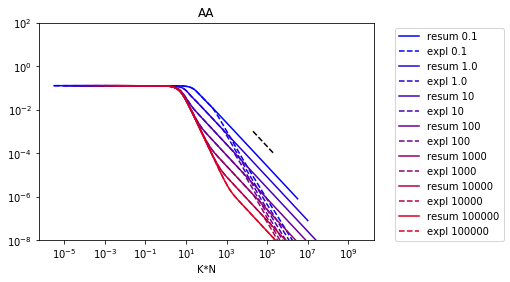

In [5]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    ax.loglog(K.real*np.sqrt(N[ii]),abs(ana[:,ii])/(N[ii]**2),\
                color=[col, 0.0, 1-col],label='resum '+str(N[ii]))
    #ax.loglog(K.real,abs(ana[:,ii]),\
    #            color=[col, 0.0, 1-col],label='resum '+str(N[ii]))
    ax.loglog(K.real*np.sqrt(N[ii]),abs(dub[:,ii])/(N[ii]**2),'--',\
                color=[col, 0.0, 1-col],label='expl '+str(N[ii]))
    #ax.loglog(K.real,abs(dub[:,ii]),'--',\
    #            color=[col, 0.0, 1-col],label='expl '+str(N[ii]))
ax.legend(bbox_to_anchor=(1.05,1),loc=2)
plotlog(2e4,1e-3,-1) 
ax.set_xlabel('K*N')
ax.set_title('AA')
ax.set_ylim([10**-8,10**2])
plt.show()

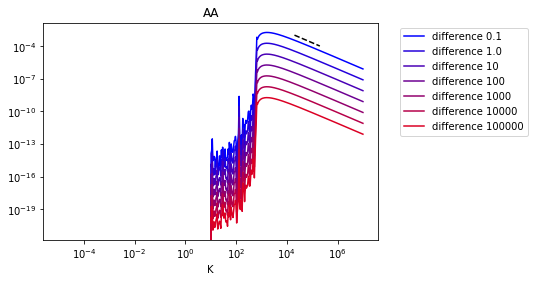

In [6]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    ax.loglog(K.real,abs(ana[:,ii]-dub[:,ii])/(N[ii]**2),\
                color=[col, 0.0, 1-col],label='difference '+str(N[ii]))

ax.legend(bbox_to_anchor=(1.05,1),loc=2)
plotlog(2e4,1e-3,-1) 
ax.set_xlabel('K')
ax.set_title('AA')
plt.show()

### AB

In [7]:
N=[0.01,0.1,1.0,10,100]
ana=np.zeros((nkpts,len(N)),dtype=type(1+1j))
dub=np.zeros((nkpts,len(N)),dtype=type(1+1j))
fa=0.5
for ii in range(0,nkpts):
    lam=0
    lam0=0
    for nn in range(0,len(N)):
        ana[ii,nn]=mp.IABswitch(N[nn],fa,lam0,lam,props[ii])
        dub[ii,nn]=mp.IABexplicit(N[nn],fa,lam0,lam,props[ii])

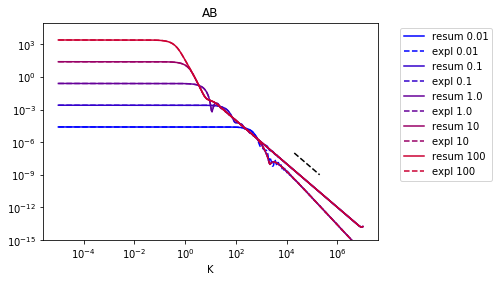

In [8]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    ax.loglog(K.real,abs(ana[:,ii]),\
                color=[col, 0.0, 1-col],label='resum '+str(N[ii]))
    ax.loglog(K.real,abs(dub[:,ii]),'--',\
                color=[col, 0.0, 1-col],label='expl '+str(N[ii]))
ax.legend(bbox_to_anchor=(1.05,1),loc=2)
plotlog(2e4,1e-7,-2)
ax.set_xlabel('K')
ax.set_title('AB')
ax.set_ylim([10**-15,100000])
plt.show()

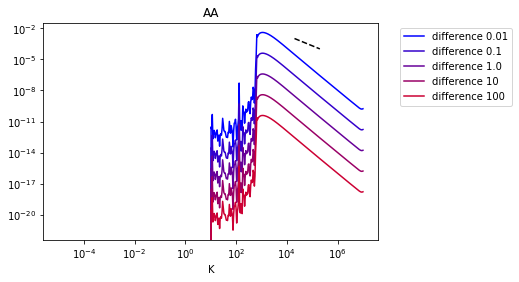

In [9]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    ax.loglog(K.real,abs(ana[:,ii]-dub[:,ii])/(N[ii]**2),\
                color=[col, 0.0, 1-col],label='difference '+str(N[ii]))

ax.legend(bbox_to_anchor=(1.05,1),loc=2)
plotlog(2e4,1e-3,-1) 
ax.set_xlabel('K')
ax.set_title('AA')
plt.show()

## 3 Point

In [10]:
nlam=10
ORDEig=25
d=3
mu=0

nkpts=150
K=np.logspace(-4,7,nkpts)
props1=[] # list of propagators at each K
props2=[] # list of propagators at each K
for ii in range(0,nkpts):

    name=ii
    props1.append( propagator.propagator(name,K[ii],mu,nlam=nlam) )

    name=ii+0.5
    props2.append( propagator.propagator(name,K[ii],mu,nlam=nlam) )

#### AAA

In [11]:
fa=0.5
N=[0.01,0.1,1.0,10,100]
frs=np.zeros((nkpts,len(N)),dtype=type(1+1j))
rsum=np.zeros((nkpts,len(N)),dtype=type(1+1j))
exl=np.zeros((nkpts,len(N)),dtype=type(1+1j))
lam_1=5
lam0_1=0
lam_2=0
lam0_2=5

In [12]:
for ii in range(0,nkpts):
    for nn in range(0,len(N)):
        frs[ii,nn]=mp.IAAAswitch(N[nn],fa,\
                                lam0_1,lam_1,\
                                lam0_2,lam_2,\
                                props1[ii],props2[ii])

In [13]:
for ii in range(0,nkpts):
    for nn in range(0,len(N)):
        exl[ii,nn]=mp.IAAAexplicit(N[nn],fa,\
                                    lam0_1,lam_1,\
                                    lam0_2,lam_2,\
                                    props1[ii],props2[ii])

5 , 0 , 5


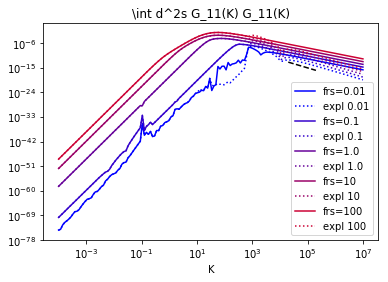

In [14]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    ax.loglog(K.real,abs(frs[:,ii].real),\
                color=[col, 0.0, 1-col],label='frs='+str(N[ii]))
    #ax.loglog(K.real,abs(rsum[:,ii].real),'+',\
    #            color=[col, 0.0, 1-col],label='resum='+str(N[ii]))
    ax.loglog(K.real,abs(exl[:,ii]),':',\
                color=[col, 0.0, 1-col],label='expl '+str(N[ii]))
ax.legend()#bbox_to_anchor=(1.05,1),loc=2)
plotlog(2e4,1e-13,-3)
ax.set_xlabel('K')
#ax.set_title('A'+str(lam_1)+',A'+str(lam_2)+',A'+str(lam0_2))
ax.set_title('\int d^2s G_11(K) G_11(K)')
#ax.set_ylim([10**-18,10**2])
print(lam_1,',',lam_2,',',lam0_2)
plt.show()

5 , 0 , 5


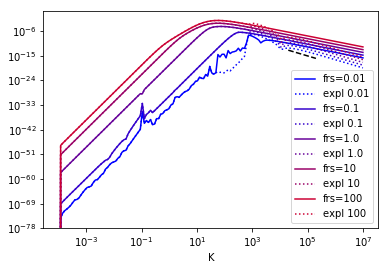

In [15]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    ax.loglog(K.real,abs(frs[:,ii]-exl[0,ii]),\
                color=[col, 0.0, 1-col],label='frs='+str(N[ii]))
    #ax.loglog(K.real,abs(rsum[:,ii]-exl[0,ii]),'+',\
    #            color=[col, 0.0, 1-col],label='resum='+str(N[ii]))
    ax.loglog(K.real,abs(exl[:,ii]-exl[0,ii]),':',\
                color=[col, 0.0, 1-col],label='expl '+str(N[ii]))
ax.legend()#bbox_to_anchor=(1.05,1),loc=2)
plotlog(2e4,1e-13,-3)
ax.set_xlabel('K')
print(lam_1,',',lam_2,',',lam0_2)
plt.show()

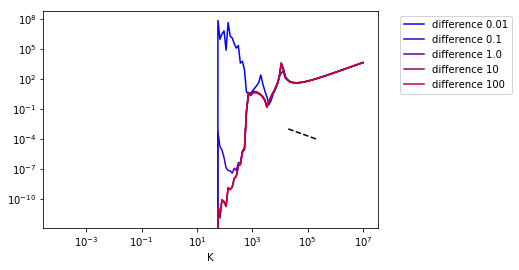

In [16]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    norm=np.minimum(abs(frs[:,ii].real),abs(exl[:,ii].real))
    ax.loglog(K.real,abs(frs[:,ii]-exl[:,ii])/norm,\
                color=[col, 0.0, 1-col],label='difference '+str(N[ii]))

ax.legend(bbox_to_anchor=(1.05,1),loc=2)
plotlog(2e4,1e-3,-1) 
ax.set_xlabel('K')
plt.show()

#### ABB

In [17]:
N=[0.01,0.1,1.0,10,100]
ana=np.zeros((nkpts,len(N)),dtype=type(1+1j))
dub=np.zeros((nkpts,len(N)),dtype=type(1+1j))
swt=np.zeros((nkpts,len(N)),dtype=type(1+1j))
fa=0.5
for ii in range(0,nkpts):
    lam_1=5
    lam0_1=0
    lam_2=0
    lam0_2=5
    for nn in range(0,len(N)):
        ana[ii,nn]=mp.IABBresum(N[nn],fa,\
                                lam0_1,lam_1,\
                                lam0_2,lam_2,\
                                props1[ii],props2[ii])
        dub[ii,nn]=mp.IABBexplicit(N[nn],fa,\
                                   lam0_1,lam_1,lam0_2,lam_2\
                                   ,props1[ii],props2[ii])
        swt[ii,nn]=mp.IABBswitch(N[nn],fa,\
                                   lam0_1,lam_1,lam0_2,lam_2\
                                   ,props1[ii],props2[ii])


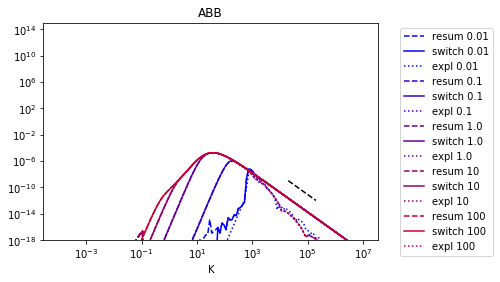

In [18]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    ax.loglog(K.real,abs(ana[:,ii]),'--',\
                color=[col, 0.0, 1-col],label='resum '+str(N[ii]))
    ax.loglog(K.real,abs(swt[:,ii]),'-',\
                color=[col, 0.0, 1-col],label='switch '+str(N[ii]))
    ax.loglog(K.real,abs(dub[:,ii]),':',\
                color=[col, 0.0, 1-col],label='expl '+str(N[ii]))
ax.legend(bbox_to_anchor=(1.05,1),loc=2)
plotlog(2e4,1e-9,-3)
ax.set_xlabel('K')
ax.set_title('ABB')
ax.set_ylim([10**-18,10**15])
plt.show()

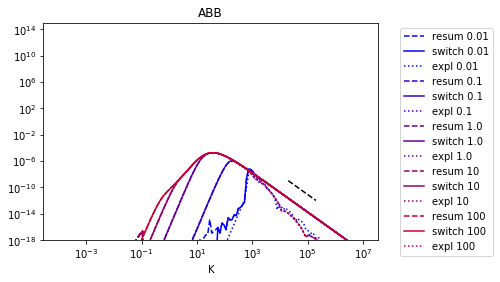

In [19]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    ax.loglog(K.real,abs(ana[:,ii]-dub[0,ii]),'--',\
                color=[col, 0.0, 1-col],label='resum '+str(N[ii]))
    ax.loglog(K.real,abs(swt[:,ii]-dub[0,ii]),'-',\
                color=[col, 0.0, 1-col],label='switch '+str(N[ii]))
    ax.loglog(K.real,abs(dub[:,ii]-dub[0,ii]),':',\
                color=[col, 0.0, 1-col],label='expl '+str(N[ii]))
ax.legend(bbox_to_anchor=(1.05,1),loc=2)
plotlog(2e4,1e-9,-3)
ax.set_xlabel('K')
ax.set_title('ABB')
ax.set_ylim([10**-18,10**15])
plt.show()

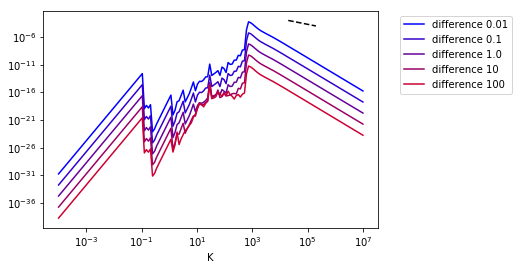

In [20]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    ax.loglog(K.real,abs(ana[:,ii]-dub[:,ii])/(N[ii]**2),\
                color=[col, 0.0, 1-col],label='difference '+str(N[ii]))

ax.legend(bbox_to_anchor=(1.05,1),loc=2)
plotlog(2e4,1e-3,-1) 
ax.set_xlabel('K')
plt.show()

## 4 point

In [21]:
nlam=5
ORDEig=10
d=3
mu1=0
mu2=0
mu3=0


settings={'nlam':5,'lamMax':500,\
          'ORDEig':25,'resCutoff':10**-11,\
          'lowKcut':10**-7,'eigCutoff':800}

nkpts=100
K=np.logspace(-3,5,nkpts)
#K=np.linspace(0.02,0.05,nkpts)
props1=[] # list of propagators at each K
props2=[] # list of propagators at each K
props3=[] # list of propagators at each K
for ii in range(0,nkpts):
    name=ii
    props1.append( propagator.propagator(name,1.0*K[ii],mu1,**settings) )

    name=ii+0.5
    props2.append( propagator.propagator(name,1.0*K[ii],mu2,**settings) )
    
    name=ii+0.25
    props3.append( propagator.propagator(name,1.0*K[ii],mu3,**settings) )

In [22]:
N=[0.001,0.01,0.1,1.0,10,100,1000, 10000]
fa=0.5
lam_1=0
lam0_1=0
lam_2=0
lam0_2=0
lam_3=0
lam0_3=0

In [23]:
frs=np.zeros((nkpts,len(N)),dtype=type(1+1j))
for ii in range(0,nkpts):   
    for nn in range(0,len(N)):
        frs[ii,nn]=mp.IAAAA(N[nn],fa,\
                                 lam0_1,lam_1,\
                                 lam0_2,lam_2,\
                                 lam0_3,lam_3,\
                                 props1[ii],props2[ii],props3[ii])

In [24]:
rsum=np.zeros((nkpts,len(N)),dtype=type(1+1j))
for ii in range(0,nkpts):   
    for nn in range(0,len(N)):
        rsum[ii,nn]=mp.IAAABresum(N[nn],fa,\
                                 lam0_1,lam_1,\
                                 lam0_2,lam_2,\
                                 lam0_3,lam_3,\
                                 props1[ii],props2[ii],props3[ii])

In [25]:
exl=np.zeros((nkpts,len(N)),dtype=type(1+1j))
for ii in range(0,nkpts):   
    for nn in range(0,len(N)):
        exl[ii,nn]=mp.IAAABexplicit(N[nn],fa,\
                                 lam0_1,lam_1,\
                                 lam0_2,lam_2,\
                                 lam0_3,lam_3,\
                                 props1[ii],props2[ii],props3[ii])

In [26]:
swt=np.zeros((nkpts,len(N)),dtype=type(1+1j))
for ii in range(0,nkpts):   
    for nn in range(0,len(N)):
        swt[ii,nn]=mp.IAAABswitch(N[nn],fa,\
                                 lam0_1,lam_1,\
                                 lam0_2,lam_2,\
                                 lam0_3,lam_3,\
                                 props1[ii],props2[ii],props3[ii])

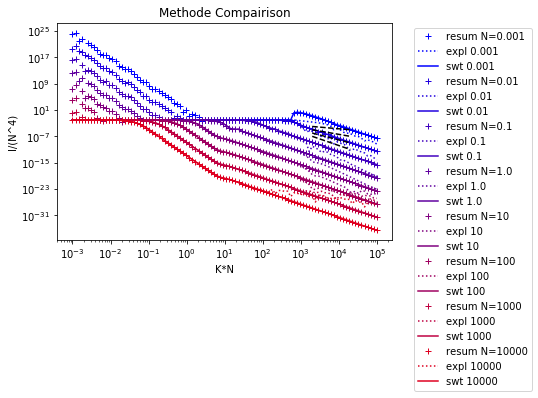

In [27]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    #ax.loglog(K.real,abs(frs[:,ii].real)*N[ii]**-4,'--',\
    #           color=[col, 0.0, 1-col],label='IAAAA '+str(N[ii]))
    ax.loglog(K.real,abs(rsum[:,ii].real)*N[ii]**-4,'+',\
                color=[col, 0.0, 1-col],label='resum N='+str(N[ii]))
    ax.loglog(K.real,abs(exl[:,ii].real)*N[ii]**-4,':',\
                color=[col, 0.0, 1-col],label='expl '+str(N[ii]))
    ax.loglog(K.real,abs(swt[:,ii].real)*N[ii]**-4,'-',\
                color=[col, 0.0, 1-col],label='swt '+str(N[ii]))
ax.legend(bbox_to_anchor=(1.05,1),loc=2)
#ax.legend(bbox_to_anchor=(1.05,1))
plotlog(2e3,1e-4,-1)
plotlog(2e3,1e-5,-2)
plotlog(2e3,1e-6,-3)
plotlog(2e3,1e-7,-4)
ax.set_xlabel('K*N')
ax.set_ylabel('I/(N^4)')
ax.set_title('Methode Compairison')
#ax.set_ylim([10**-18,10**15])
plt.show()

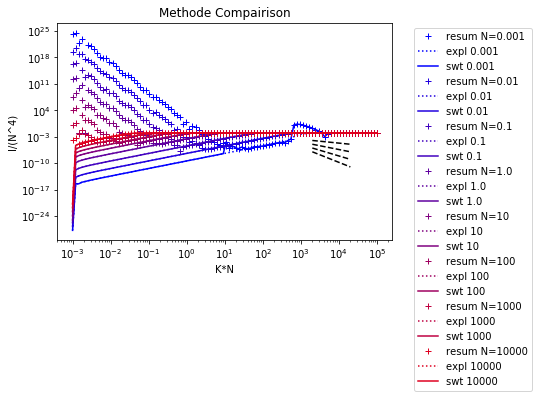

In [28]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    #ax.loglog(K.real,abs(frs[:,ii].real-exl[0,ii])*N[ii]**-4,'--',\
    #           color=[col, 0.0, 1-col],label='IAAAA '+str(N[ii]))
    
    ax.loglog(K.real,abs(rsum[:,ii].real-exl[0,ii])*N[ii]**-4,'+',\
                color=[col, 0.0, 1-col],label='resum N='+str(N[ii]))
    
    ax.loglog(K.real,abs(exl[:,ii].real-exl[0,ii])*N[ii]**-4,':',\
                color=[col, 0.0, 1-col],label='expl '+str(N[ii]))
    
    ax.loglog(K.real,abs(swt[:,ii].real-exl[0,ii])*N[ii]**-4,'-',\
                color=[col, 0.0, 1-col],label='swt '+str(N[ii]))
ax.legend(bbox_to_anchor=(1.05,1),loc=2)
#ax.legend(bbox_to_anchor=(1.05,1))
plotlog(2e3,1e-4,-1)
plotlog(2e3,1e-5,-2)
plotlog(2e3,1e-6,-3)
plotlog(2e3,1e-7,-4)
ax.set_xlabel('K*N')
ax.set_ylabel('I/(N^4)')
ax.set_title('Methode Compairison')
#ax.set_ylim([10**-18,10**15])
plt.show()

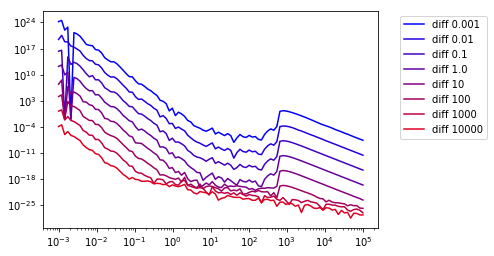

In [29]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    #ax.loglog(K.real*np.sqrt(N[ii]),abs(frs[:,ii]-exl[:,ii])/(N[ii]**2),\
    #            color=[col, 0.0, 1-col],label='difference '+str(N[ii]))
    ax.loglog(K.real,abs(rsum[:,ii].real-exl[:,ii].real)*N[ii]**-4,'-',\
                color=[col, 0.0, 1-col],label='diff '+str(N[ii]))
ax.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.show()

/home/users/qmac/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


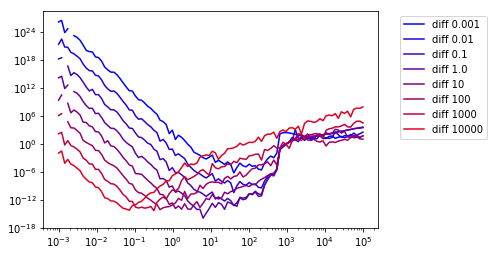

In [30]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    #ax.loglog(K.real*np.sqrt(N[ii]),abs(frs[:,ii]-exl[:,ii])/(N[ii]**2),\
    #            color=[col, 0.0, 1-col],label='difference '+str(N[ii]))
    norm=np.minimum(abs(rsum[:,ii].real),abs(exl[:,ii].real))
    ax.loglog(K.real,abs(rsum[:,ii].real-exl[:,ii].real)/norm,'-',\
                color=[col, 0.0, 1-col],label='diff '+str(N[ii]))
ax.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.show()

In [31]:
np.minimum(np.array([1,2,3]),np.array([3,2,1]))

array([1, 2, 1])